### Demand Forecasting for DIVVY BIKES in Chicago

Pratik Relekar (pratik.relekar@gmail.com)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv("/BikeDemandDaily.csv")


In [ ]:

# # Convert Season, working_day, day, and holiday to categorical variables
# df['Season'] = pd.Categorical(df['season'], categories=[1, 2, 3, 4], ordered=True)
# df['working_day'] = pd.Categorical(df['workingday'], categories=[0, 1], ordered=True)
# df['day'] = pd.Categorical(df['day'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
# df['holiday'] = pd.Categorical(df['holiday'], categories=[0, 1], ordered=True)


# Create dummy variables for Season, working_day, day, and holiday
#dummy_season = pd.get_dummies(df['season'], prefix='season', drop_first=True)
#dummy_working_day = pd.get_dummies(df['workingday'], prefix='working_day', drop_first=True)
#dummy_day = pd.get_dummies(df['day'], prefix='day', drop_first=True)
#dummy_holiday = pd.get_dummies(df['holiday'], prefix='holiday', drop_first=True)

# Concatenate the dummy variables with the original dataframe
#df = pd.concat([df, dummy_season, dummy_working_day, dummy_day, dummy_holiday], axis=1)

# Drop the original categorical variables
#df.drop(['season', 'workingday', 'day', 'holiday'], axis=1, inplace=True)


# Confirm the changes
print(df.dtypes)

Index              int64
year               int64
month              int64
meanatemp        float64
maxatemp         float64
minatemp         float64
sdatemp          float64
meanhumidity     float64
maxhumidity        int64
minhumidity        int64
sdhumidity       float64
meanwindspeed    float64
maxwindspeed     float64
minwindspeed     float64
sdwindspeed      float64
Casual             int64
Registered         int64
Total              int64
season_2           uint8
season_3           uint8
season_4           uint8
working_day_1      uint8
day_2              uint8
day_3              uint8
day_4              uint8
day_5              uint8
day_6              uint8
day_7              uint8
day_8              uint8
day_9              uint8
day_10             uint8
day_11             uint8
day_12             uint8
day_13             uint8
day_14             uint8
day_15             uint8
day_16             uint8
day_17             uint8
day_18             uint8
day_19             uint8


In [ ]:
df

,Index,year,month,day,season,holiday,workingday,meanatemp,maxatemp,minatemp,...,maxhumidity,minhumidity,sdhumidity,meanwindspeed,maxwindspeed,minwindspeed,sdwindspeed,Casual,Registered,Total
0,1,1,1,1,1,0,0,18.181250,22.725,12.880,...,94,72,5.904432,10.749871,19.9995,0.0000,8.984065,336,691,1027
1,2,1,1,2,1,0,0,17.686957,22.725,10.605,...,100,39,18.773141,16.652122,30.0026,8.9981,5.087279,131,693,824
2,3,1,1,3,1,0,1,9.470227,12.880,5.305,...,69,30,10.682348,16.636709,27.9993,0.0000,7.550605,128,1238,1366
3,4,1,1,4,1,0,1,10.606087,14.395,6.820,...,74,48,8.977134,10.739809,22.0028,0.0000,5.344103,118,1471,1589
4,5,1,1,5,1,0,1,11.463478,15.910,9.090,...,74,28,13.226814,12.522300,22.0028,0.0000,6.694015,89,1526,1615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,452,2,12,15,4,0,0,16.919167,21.210,12.880,...,87,47,11.983609,7.125450,16.9979,0.0000,5.101255,768,4304,5072
452,453,2,12,16,4,0,0,18.496875,20.455,16.665,...,93,62,6.713468,6.749692,12.9980,0.0000,4.502822,538,3253,3791
453,454,2,12,17,4,0,1,20.075000,21.210,17.425,...,100,87,3.850231,6.583308,16.9979,0.0000,5.822208,222,4379,4601
454,455,2,12,18,4,0,1,20.485417,24.240,16.665,...,94,41,21.526147,14.834079,32.9975,0.0000,9.648945,441,5139,5580


In [ ]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print(df.head())

   Index  year  month  day  season  holiday  workingday  meanatemp  maxatemp  \
0      1     1      1    1       1        0           0  18.181250    22.725   
1      2     1      1    2       1        0           0  17.686957    22.725   
2      3     1      1    3       1        0           1   9.470227    12.880   
3      4     1      1    4       1        0           1  10.606087    14.395   
4      5     1      1    5       1        0           1  11.463478    15.910   

   minatemp   sdatemp  meanhumidity  maxhumidity  minhumidity  sdhumidity  \
0    12.880  3.750746     80.583333           94           72    5.904432   
1    10.605  3.708014     69.608696          100           39   18.773141   
2     5.305  2.380840     43.727273           69           30   10.682348   
3     6.820  2.574481     59.043478           74           48    8.977134   
4     9.090  1.845936     43.695652           74           28   13.226814   

   meanwindspeed  maxwindspeed  minwindspeed  sdwindspee

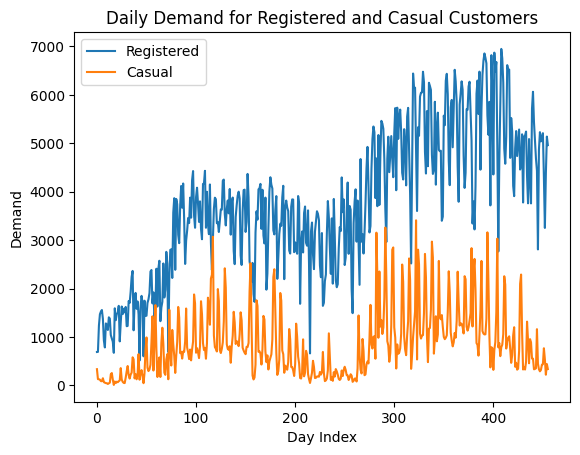

In [ ]:
### A1. Graphical comparison of registered and casual demand.

## (i) Plot the daily registered and causal demand on the y-axis and the day index on the x-axis. Comment on the observations. (Hint. Think of the patterns of demand for the two groups of customers, which group shows more dispersion around the daily mean demand? Think of the time trends. Where do you observe greater growth? ... )
# Create a new column for the day index
df['day_index'] = df.index

# Plot the daily registered and casual demand
plt.plot(df['day_index'], df['Registered'], label='Registered')
plt.plot(df['day_index'], df['Casual'], label='Casual')
plt.xlabel('Day Index')
plt.ylabel('Demand')
plt.title('Daily Demand for Registered and Casual Customers')
plt.legend()
plt.show()


The registered demand is higher than the casual demand as registered users tend to use the service more naturally. The demand increases in the case of Registered customers and it gradually increases with number of days whereas for casual customers it's more or less constant.

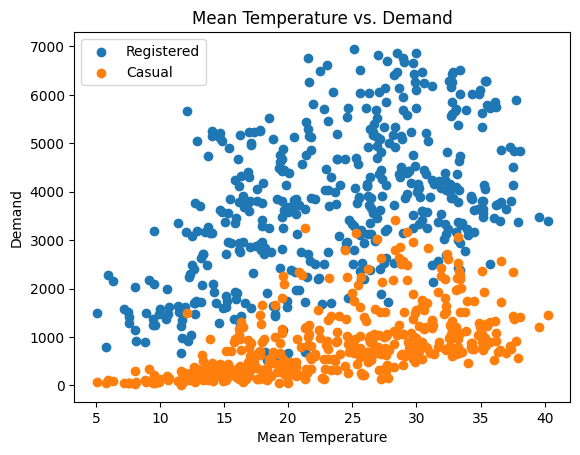

In [ ]:
## (ii) Plot the following scatter diagrams:

# a. Mean temperature versus registered and causal demand:

plt.scatter(df['meanatemp'], df['Registered'], label='Registered')
plt.scatter(df['meanatemp'], df['Casual'], label='Casual')
plt.xlabel('Mean Temperature')
plt.ylabel('Demand')
plt.title('Mean Temperature vs. Demand')
plt.legend()
plt.show()


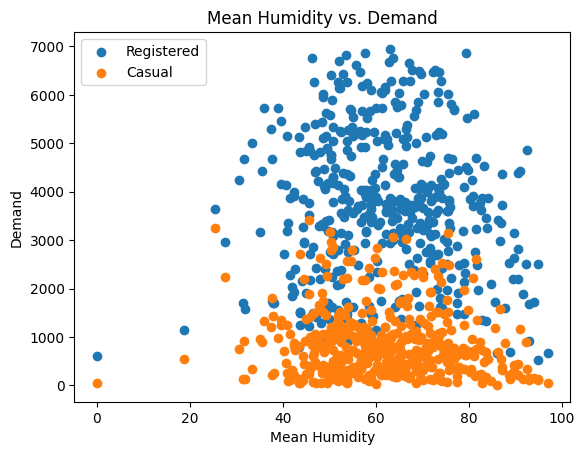

In [ ]:
# b. Mean humidity versus registered and causal demand:

# Scatter plot of mean humidity versus registered and causal demand
plt.scatter(df['meanhumidity'], df['Registered'], label='Registered')
plt.scatter(df['meanhumidity'], df['Casual'], label='Casual')
plt.xlabel('Mean Humidity')
plt.ylabel('Demand')
plt.title('Mean Humidity vs. Demand')
plt.legend()
plt.show()

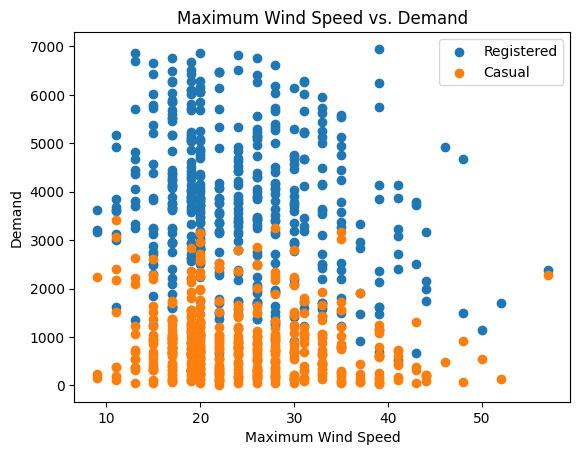

In [ ]:
# c. Maximum wind speed versus registered and causal demand:

# Scatter plot of maximum wind speed versus registered and causal demand
plt.scatter(df['maxwindspeed'], df['Registered'], label='Registered')
plt.scatter(df['maxwindspeed'], df['Casual'], label='Casual')
plt.xlabel('Maximum Wind Speed')
plt.ylabel('Demand')
plt.title('Maximum Wind Speed vs. Demand')
plt.legend()
plt.show()

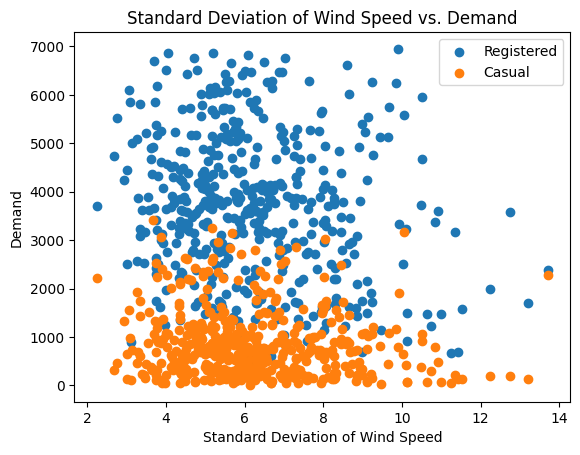

In [ ]:
# d. The standard deviation of wind speed versus registered and causal demand:

# Scatter plot of standard deviation of wind speed versus registered and causal demand
plt.scatter(df['sdwindspeed'], df['Registered'], label='Registered')
plt.scatter(df['sdwindspeed'], df['Casual'], label='Casual')
plt.xlabel('Standard Deviation of Wind Speed')
plt.ylabel('Demand')
plt.title('Standard Deviation of Wind Speed vs. Demand')
plt.legend()
plt.show()

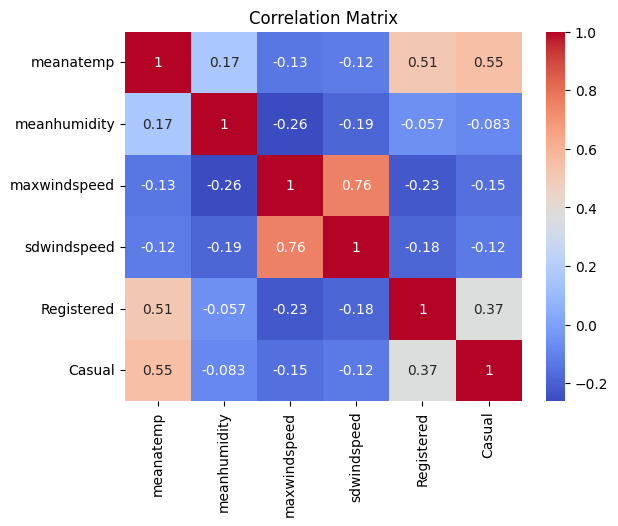

In [ ]:
## e. Comment on our observations. (Think of which factors seem to be more correlated with demand and which type of demand. What could be the potential reasons for what you observe?)

# Calculating the correlation coefficient
corr = df[['meanatemp', 'meanhumidity', 'maxwindspeed', 'sdwindspeed', 'Registered', 'Casual']].corr()

# Creating a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Adding title
plt.title('Correlation Matrix')

# Showing the plot
plt.show()

Mean temperature is directly correlated with registered as well as casual customers. As per my analysis, people prefer using bike when mean temperature increases against preferred mode of walking. While there is no clear information from the preliminary analysis, we will deep dive into it.

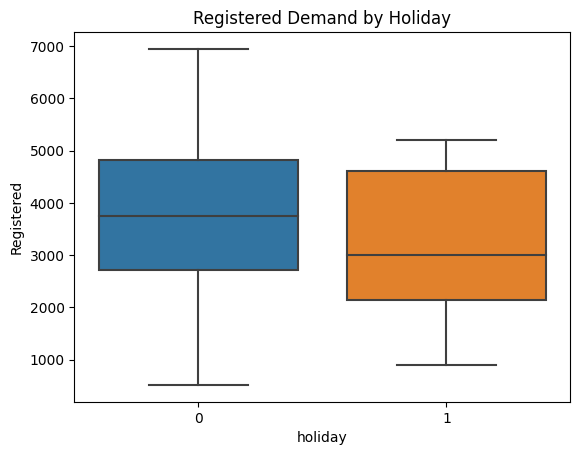

In [ ]:
## (iii) a. Registered demand versus holiday

# Box plot of registered demand by holiday
sns.boxplot(x='holiday', y='Registered', data=df)
plt.title('Registered Demand by Holiday')
plt.show()

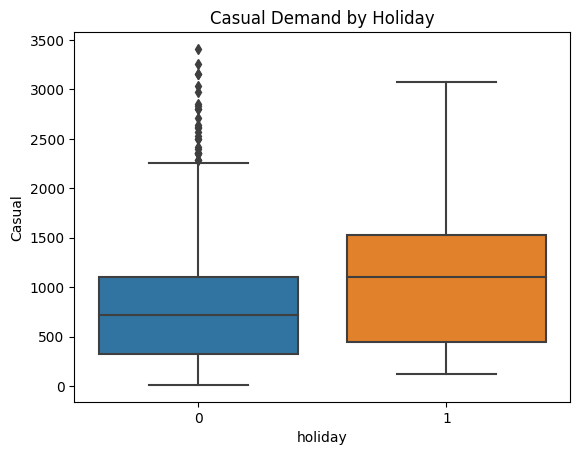

In [ ]:
## b. Causal demand versus holiday

# Box plot of causal demand by holiday
sns.boxplot(x='holiday', y='Casual', data=df)
plt.title('Casual Demand by Holiday')
plt.show()

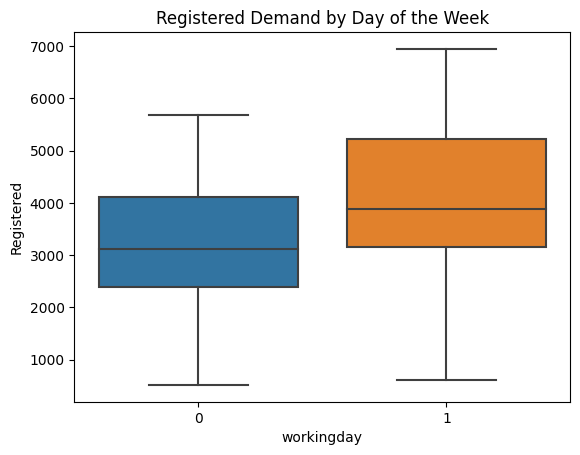

In [ ]:
## c. Registered demand versus day of the week

# Box plot of registered demand by day of the week
sns.boxplot(x='workingday', y='Registered', data=df)
plt.title('Registered Demand by Day of the Week')
plt.show()

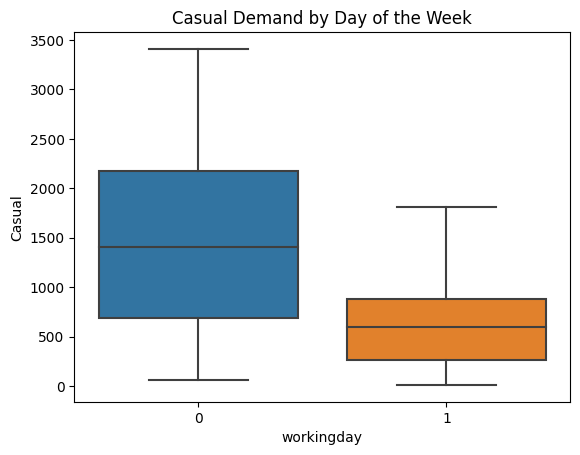

In [ ]:
## d. Causal demand versus day of the week

# Box plot of causal demand by day of the week
sns.boxplot(x='workingday', y='Casual', data=df)
plt.title('Casual Demand by Day of the Week')
plt.show()

e. Comment on your observations. (Think of which factors seem to be more correlated with demand and which type of demand. What could be the potential reasons for what you observe?)

Answer: From the box plot visualisation, it is clear that registered users are working professionals who tend to use the service during the working days of the week whereas the casual riders with an assumption are mostly non-working/tourist population.

### Part A: Disaggregated Demand Forecasting and aggregating up

In [ ]:
# Create dummy variables for Season, working_day, day, and holiday
dummy_season = pd.get_dummies(df['season'], prefix='season', drop_first=True)
dummy_working_day = pd.get_dummies(df['workingday'], prefix='working_day', drop_first=True)
dummy_day = pd.get_dummies(df['day'], prefix='day', drop_first=True)
dummy_holiday = pd.get_dummies(df['holiday'], prefix='holiday', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_season, dummy_working_day, dummy_day, dummy_holiday], axis=1)

# Drop the original categorical variables
df.drop(['season', 'workingday', 'day', 'holiday'], axis=1, inplace=True)


# Confirm the changes
print(df.dtypes)

Index              int64
year               int64
month              int64
meanatemp        float64
maxatemp         float64
minatemp         float64
sdatemp          float64
meanhumidity     float64
maxhumidity        int64
minhumidity        int64
sdhumidity       float64
meanwindspeed    float64
maxwindspeed     float64
minwindspeed     float64
sdwindspeed      float64
Casual             int64
Registered         int64
Total              int64
day_index          int64
season_2           uint8
season_3           uint8
season_4           uint8
working_day_1      uint8
day_2              uint8
day_3              uint8
day_4              uint8
day_5              uint8
day_6              uint8
day_7              uint8
day_8              uint8
day_9              uint8
day_10             uint8
day_11             uint8
day_12             uint8
day_13             uint8
day_14             uint8
day_15             uint8
day_16             uint8
day_17             uint8
day_18             uint8


In [ ]:
## A2. Create LASSO models for registered demand and causal demand separately.
# (i) Split the sample by day Index. All observations less than or equal to day index 300 are in the training set and the remaining is in the testing set.

# Split data into training and testing sets
train = df[df['Index'] <= 300]
test = df[df['Index'] > 300]



In [ ]:
# (ii) Follow the class code to set up the cross-validation for registered and casual demand separately. Report the optimal cross-validation penalty for both models. Use the training set only.

from sklearn.impute import SimpleImputer

# Impute missing values with mean values in the training set
imputer = SimpleImputer()
X_reg_train = imputer.fit_transform(train.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1))
y_reg_train = np.log(train['Registered'])
X_cas_train = imputer.fit_transform(train.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1))
y_cas_train = np.log(train['Casual'])

# Set up Lasso models with cross-validation for registered and casual demand
# list_alpha = [1, 0.1, 0.01, 0.001]

reg_lasso_cv = LassoCV(cv=10, random_state=0).fit(X_reg_train, y_reg_train)
cas_lasso_cv = LassoCV(cv=10, random_state=0).fit(X_cas_train, y_cas_train)

# Report optimal cross-validation penalties for registered and casual demand
print('Optimal penalty for registered demand:', reg_lasso_cv.alpha_)
print('Optimal penalty for casual demand:', cas_lasso_cv.alpha_)




Optimal penalty for registered demand: 0.024309491882408413
Optimal penalty for casual demand: 0.020240735532588497


In [ ]:
# (iii) Construct the final LASSO model using the optimal penalty found at the cross-validation stage. Comment on the selected variables. Again, use the training set only.
from sklearn.linear_model import Lasso

# Construct Lasso model with optimal penalty for registered demand
reg_lasso_final = Lasso(alpha=reg_lasso_cv.alpha_)
reg_lasso_final.fit(X_reg_train, y_reg_train)

# Get column names for X_reg_train
X_reg_columns = train.drop(['Registered', 'Casual', 'Total', "Index"], axis=1).columns

# Convert X_reg_train to a pandas dataframe
X_reg_train_df = pd.DataFrame(X_reg_train, columns=X_reg_columns)

# Print the selected variables for registered demand
reg_coef = pd.Series(reg_lasso_final.coef_, index=X_reg_train_df.columns)
print('Selected variables for registered demand:\n', reg_coef[reg_coef!=0])

# Construct Lasso model with optimal penalty for casual demand
cas_lasso_final = Lasso(alpha=cas_lasso_cv.alpha_)
cas_lasso_final.fit(X_cas_train, y_cas_train)

# Get column names for X_cas_train
X_cas_columns = train.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1).columns

# Convert X_cas_train to a pandas dataframe
X_cas_train_df = pd.DataFrame(X_cas_train, columns=X_cas_columns)

# Print the selected variables for casual demand
cas_coef = pd.Series(cas_lasso_final.coef_, index=X_cas_train_df.columns)
print('Selected variables for casual demand:\n', cas_coef[cas_coef!=0])

Selected variables for registered demand:
 month            0.003240
maxatemp         0.005933
minatemp         0.023536
meanhumidity    -0.002947
maxhumidity      0.002654
minhumidity     -0.006277
sdhumidity       0.003279
maxwindspeed    -0.009564
day_index        0.003116
season_2         0.019033
working_day_1    0.118222
dtype: float64
Selected variables for casual demand:
 month            0.007134
meanatemp        0.065934
minatemp         0.020898
sdatemp          0.081252
meanhumidity    -0.007673
maxhumidity      0.003417
minhumidity     -0.008410
maxwindspeed    -0.014649
minwindspeed    -0.000119
day_index        0.002393
season_2         0.314562
working_day_1   -0.893535
dtype: float64


In [ ]:
# (iv) Predict the testing set. Report the Root Mean Squared Error (RMSE) on the testing set.

from sklearn.impute import SimpleImputer

# Separate the predictors (X) and target variable (y) for registered demand in testing set
X_reg_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_reg_test = np.log(test['Registered'])

# Impute missing values with mean values in the testing set for registered demand
imputer = SimpleImputer()
X_reg_test = imputer.fit_transform(X_reg_test)

# Predict registered demand on the testing set
y_reg_pred = reg_lasso_final.predict(X_reg_test)

# Calculate RMSE for registered demand on the testing set
reg_rmse = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
print('RMSE for registered demand:', reg_rmse)

# Separate the predictors (X) and target variable (y) for casual demand in testing set
X_cas_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_cas_test = np.log(test['Casual'])

# Impute missing values with mean values in the testing set for casual demand
X_cas_test = imputer.fit_transform(X_cas_test)

# Predict casual demand on the testing set
y_cas_pred = cas_lasso_final.predict(X_cas_test)

# Calculate RMSE for casual demand on the testing set
cas_rmse = mean_squared_error(y_cas_test, y_cas_pred, squared=False)
print('RMSE for casual demand:', cas_rmse)





RMSE for registered demand: 0.3367986149330452
RMSE for casual demand: 0.49613486917198524


In [ ]:
# (v) Add the predictions of registered and casual demand to get the prediction for total demand. Report the RMSE.


# Predict registered demand on the testing set
y_reg_pred = reg_lasso_final.predict(X_reg_test)

# Predict casual demand on the testing set
y_cas_pred = cas_lasso_final.predict(X_cas_test)

# Calculate total demand by adding registered and casual demand predictions
y_total_pred = np.log(np.exp(y_reg_pred) + np.exp(y_cas_pred))


# Calculate RMSE for total demand on the testing set
y_total_test = np.log(test['Total'])
total_rmse = mean_squared_error(y_total_test, y_total_pred, squared=False)
print('RMSE for total demand:', total_rmse)


RMSE for total demand: 0.35618601229469427


In [ ]:
# A3. Time series prediction models – Auto Regressive Moving Average (ARMA). 

# (i) Using the variables selected by the LASSO Models create linear regression models using the training set for both registered and casual demand. Report the summary of the regression and comment on the important predictors for both registered and causal demand.

import statsmodels.api as sm

# Separate the predictors (X) and target variable (y) for registered demand in the training set using selected variables from LASSO model
X_reg_train = train[reg_coef[reg_coef!=0].index.values]
y_reg_train = np.log(train['Registered'])

# Fit a linear regression model on the training set for registered demand using selected variables
reg_model = LinearRegression().fit(X_reg_train, y_reg_train)

# Print the summary of the regression model for registered demand
reg_summary = sm.OLS(y_reg_train, X_reg_train).fit().summary()
print('\nRegistered Demand Regression Summary:\n', reg_summary)

# Separate the predictors (X) and target variable (y) for casual demand in the training set using selected variables from LASSO model
X_cas_train = train[cas_coef[cas_coef!=0].index.values]
y_cas_train = np.log(train['Casual'])

# Fit a linear regression model on the training set for casual demand using selected variables
cas_model = LinearRegression().fit(X_cas_train, y_cas_train)

# Print the summary of the regression model for casual demand
cas_summary = sm.OLS(y_cas_train, X_cas_train).fit().summary()
print('\nCasual Demand Regression Summary:\n', cas_summary)




Registered Demand Regression Summary:
                                  OLS Regression Results                                
Dep. Variable:             Registered   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              2169.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                   1.89e-270
Time:                        06:37:32   Log-Likelihood:                         -382.67
No. Observations:                 300   AIC:                                      787.3
Df Residuals:                     289   BIC:                                      828.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975

Text(0.5, 1.0, 'Casual Demand Autocorrelation Function')

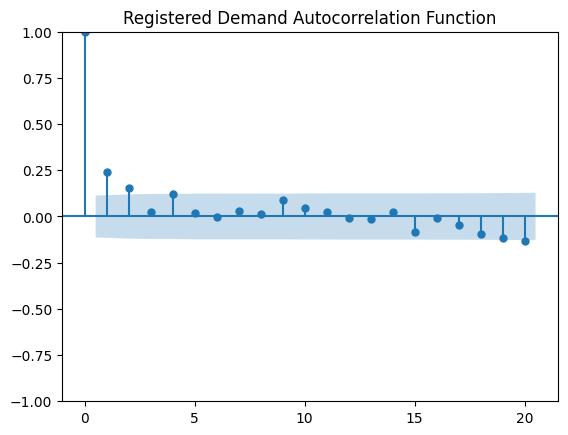

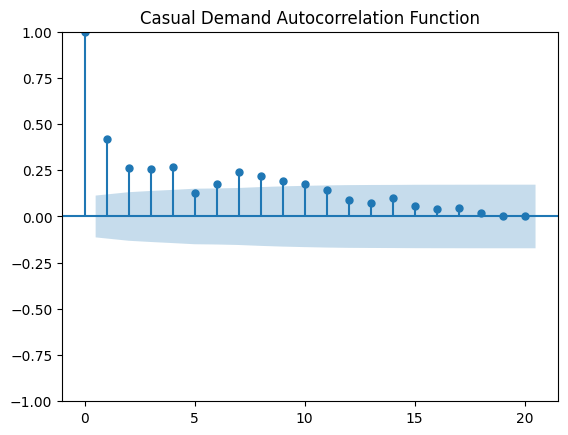

In [ ]:
# (ii) Use the residuals of the regression models to plot the Autocorrelation Function for both types of demand (ACF). Which demand type demonstrates greater auto-correlation? Why?

from statsmodels.graphics.tsaplots import plot_acf

# Registered demand
reg_residuals = np.array(np.log(train['Registered'])) - reg_model.predict(X_reg_train)
plot_acf(reg_residuals, lags=20)
plt.title('Registered Demand Autocorrelation Function')

# Casual demand
cas_residuals = np.array(np.log(train['Casual'])) - cas_model.predict(X_cas_train)
plot_acf(cas_residuals, lags=20)
plt.title('Casual Demand Autocorrelation Function')



In [ ]:
# (iii) Fit an ARMA(2,2) time-series model on the training set for both registered and casual demand. Report the summary.

# ARMA model for registered and casual demand

from statsmodels.tsa.arima.model import ARIMA

# Registered
reg_arma = ARIMA(reg_residuals, order=(2, 0, 2)).fit()
print('\nRegistered Demand ARMA Summary:')
print(reg_arma.summary())

# Casual
cas_arma = ARIMA(cas_residuals, order=(2, 0, 2)).fit()
print('\nCasual Demand ARMA Summary:')
print(cas_arma.summary())




Registered Demand ARMA Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  89.533
Date:                Fri, 14 Apr 2023   AIC                           -167.065
Time:                        06:37:41   BIC                           -144.843
Sample:                             0   HQIC                          -158.172
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.017     -0.031      0.976      -0.034       0.033
ar.L1         -0.4952      0.260     -1.905      0.057      -1.005       0.014
ar.L2          0.04

In [ ]:
## (iv) Predict the demand for registered and causal customers for the testing set. Aggregate the individual demands to create the total demand forecast. Report the RMSE.

# Separate the predictors (X) and target variable (y) for registered demand in the testing set
X_reg_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_reg_test = np.log(test['Registered'])

# Separate the predictors (X) and target variable (y) for casual demand in the testing set
X_cas_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_cas_test = np.log(test['Casual'])

# Impute missing values in the testing set with mean values from the training set
X_reg_test = imputer.transform(X_reg_test)
X_cas_test = imputer.transform(X_cas_test)

# Predict registered demand on the testing set
y_reg_pred = reg_lasso_final.predict(X_reg_test)

# Predict casual demand on the testing set
y_cas_pred = cas_lasso_final.predict(X_cas_test)

# Calculate total demand by adding registered and casual demand predictions
y_total_pred = np.exp(y_reg_pred) + np.exp(y_cas_pred)

# Separate the predictors (X) and target variable (y) for total demand in testing set
X_total_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_total_test = np.log(test['Total'])

# Calculate RMSE for total demand on the testing set
total_rmse = mean_squared_error(y_total_test, np.log(y_total_pred), squared=False)
print('RMSE for total demand:', total_rmse)


RMSE for total demand: 0.35618601229469427


### Part B: Aggregate Demand Forecast

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
# prepare data
X_train = train.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_train = train['Total']
X_test = test.drop(['Registered', 'Casual', 'Total', 'Index'], axis=1)
y_test = test['Total']

In [ ]:
# Part B: (i) Follow A2 to create a LASSO model from the training set for total demand. Predict the testing set and report the RMSPE.

from sklearn.impute import SimpleImputer

# create an imputer object to fill in missing values with mean
imputer = SimpleImputer(strategy='mean')

# fit and transform the training set
X_train_imputed = imputer.fit_transform(X_train)

# fit the LASSO model on the imputed data
lasso_model = Lasso()
lasso_model.fit(X_train_imputed, y_train)

# predict on the testing set and calculate RMSPE
X_test_imputed = imputer.transform(X_test)
y_pred_lasso = lasso_model.predict(X_test_imputed)


# Calculate percentage error
percentage_error = ((y_test - y_pred_lasso) / y_test) * 100

# Square the percentage error
squared_percentage_error = percentage_error ** 2

# Calculate mean squared percentage error
mean_squared_percentage_error = np.mean(squared_percentage_error)

# Calculate RMSPE
rmspe = np.sqrt(mean_squared_percentage_error)

print("RMSPE for LASSO model:", rmspe)



RMSPE for LASSO model: 18.178374622469626


In [ ]:
# (ii) Create an ARMA(2,2) time-series model for total demand
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# ARMA(2,2) model
arma_model = ARIMA(np.log(y_train), order=(2, 0, 2))
arma_model_fit = arma_model.fit()
y_pred_arma = arma_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
rmse_arma = np.sqrt(mean_squared_error(np.log(y_test), y_pred_arma))
print("RMSE for ARMA(2,2) model:", rmse_arma)




RMSE for ARMA(2,2) model: 0.26381242753555506


By comparing two RMSE values from Part A (Disggregated) and Part B (Aggregated), the lower value of RMSE denotes better model performance and accuracy, so the ARMA model in Part B is likely to be more precise in its forecasting of total demand. The aggregated model is more stable over time, so it is more accurate and reliable for forecasting total demand.


When comparing the 2 RMSE values for total demand from part A and B, we can observe that part B has the lower RMSE value of approximately 0.263. This indicates that aggregated forecasting using ARMA(2,2) model seem to yield better forecasting for total demand.


However, it's important to note that the data and modeling techniques used in Part A and Part B are different, so direct comparison between the RMSE values may not be entirely fair. Additionally, it's also possible that the disaggregated forecasting in Part A (using the different store types) may have greater precision than the aggregated forecasting in Part B (using the total demand for all stores), especially if there are signi cant differences in demand patterns between different store types.